**Modelo_Telecomunicaciones**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

**Sobre conjunto de datos
Imagine que un proveedor de telecomunicaciones ha segmentado su base de clientes por patrones de uso del servicio, categorizando a los clientes en cuatro grupos. Si los datos demográficos se pueden utilizar para predecir la pertenencia al grupo, la empresa puede personalizar las ofertas para clientes potenciales individuales. Es un problema de clasificación. Es decir, dado el conjunto de datos, con etiquetas predefinidas, necesitamos construir un modelo que se use para predecir la clase de un caso nuevo o desconocido.

El ejemplo se centra en el uso de datos demográficos, como la región, la edad y el matrimonio, para predecir patrones de uso.

El campo de destino, llamado custcat, tiene cuatro valores posibles que corresponden a los cuatro grupos de clientes, de la siguiente manera: 1- Servicio básico 2- Servicio electrónico 3- Servicio Plus 4- Servicio total

Nuestro objetivo es construir un clasificador, para predecir la clase de casos desconocidos. Usaremos un tipo específico de clasificación llamado K vecino más cercano.**

In [2]:
df = pd.read_csv(r'D:\Usuarios\oscagaal\Documents\Diplomado_ML\teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


**Revision de Variables**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


**Recodificar**

In [4]:
df["marital"] = df["marital"].astype(int).astype(str)
df["gender"] = df["gender"].astype(int).astype(str)
df["custcat"] = df["custcat"].astype(int).astype(str)
df["region"] = df["region"].astype(int).astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   object 
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   object 
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   object 
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   object 
dtypes: float64(2), int64(6), object(4)
memory usage: 93.9+ KB


**Distribucion**

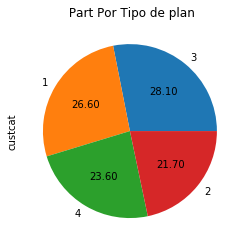

In [5]:
plot = df["custcat"].value_counts().plot(kind="pie",autopct="%.2f",title=" Part Por Tipo de plan")

**Histograma**

In [6]:
import seaborn as sns

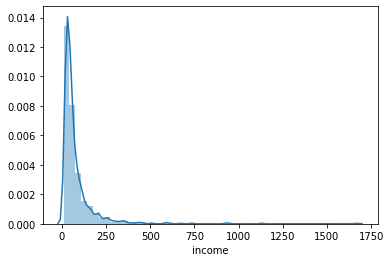

In [7]:
sns.distplot( df["income"] )

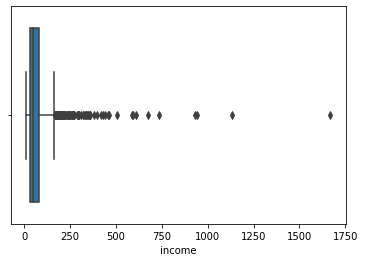

In [8]:
sns.boxplot( x=df["income"] )


**Variables Dummy**

In [9]:
gen_dummy =pd.get_dummies(df["gender"])
gen_dummy

EC_dummy =pd.get_dummies(df["marital"])
EC_dummy

,0,1
0,0,1
1,0,1
2,0,1
3,1,0
4,0,1
...,...,...
995,1,0
996,1,0
997,1,0
998,1,0


In [10]:
df1 = pd.concat([df,gen_dummy,EC_dummy],axis=1)

In [11]:
df1.head(2)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat,0,1,0,1
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1,1,0,0,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4,1,0,0,1


In [12]:
df1.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat', '0', '1', '0', '1'],
      dtype='object')

In [13]:
df1.columns =['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat', 'Mujer', 'Hombre',
       'Soltero', 'Casado']

In [14]:
df1.head(2)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat,Mujer,Hombre,Soltero,Casado
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1,1,0,0,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4,1,0,0,1


**Dividir en train y Test**

In [15]:
df1.shape

(1000, 16)

In [16]:
df = df1.iloc[:,1:16]
df.head(2)

,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat,Mujer,Hombre,Soltero,Casado
0,13,44,1,9,64.0,4,5,0.0,0,2,1,1,0,0,1
1,11,33,1,7,136.0,5,5,0.0,0,6,4,1,0,0,1


In [17]:
X = df[["tenure","age","marital","address","income","ed","employ","retire","gender","reside","Mujer","Hombre","Soltero","Casado"]]

In [18]:
Y = df["custcat"].values

**Estandarizar X**

In [19]:
from sklearn.preprocessing import MinMaxScaler
S = MinMaxScaler()
X_S = S.fit_transform(X)

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(X_S ,Y,test_size=0.2,random_state=4)

**Modelos**

Text(0.5, 0, 'K')

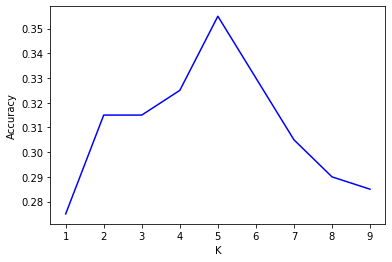

In [28]:
### KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

ks = 10
mean_acc=np.zeros((ks-1))
std=np.zeros((ks-1))
matrix_confusion = [];

for n in range(1,ks):
    modelo_knn = KNeighborsClassifier(n_neighbors=n).fit(x_train,y_train)
    ypredit=modelo_knn.predict(x_test)
    mean_acc[n-1]=metrics.accuracy_score(y_test,ypredit)

plt.plot(range(1,ks),mean_acc,"b")
plt.ylabel("Accuracy")
plt.xlabel("K")

In [29]:
k=5
modelo_knn = KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)
modelo_knn
y_Pred = modelo_knn.predict(x_test)
print("Accuracy test", metrics.accuracy_score(y_test,modelo_knn.predict(x_test)))

Accuracy test 0.355


**Matriz C**

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix(y_test,y_Pred)

array([[29,  6, 13,  3],
       [ 7, 13, 12, 12],
       [22,  8, 19,  5],
       [22, 13,  6, 10]], dtype=int64)

In [32]:
print(classification_report(y_test,y_Pred))

              precision    recall  f1-score   support

           1       0.36      0.57      0.44        51
           2       0.33      0.30      0.31        44
           3       0.38      0.35      0.37        54
           4       0.33      0.20      0.25        51

    accuracy                           0.36       200
   macro avg       0.35      0.35      0.34       200
weighted avg       0.35      0.35      0.34       200

